In [106]:
import pandas as pd
data=pd.read_csv("diabetes.csv")
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [107]:
#Feature/Columns for the model
feature_cols=['Pregnancies','Glucose','Insulin','Age']
x=data[feature_cols]
y=data.Outcome

In [108]:
#Split the dataset into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [109]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

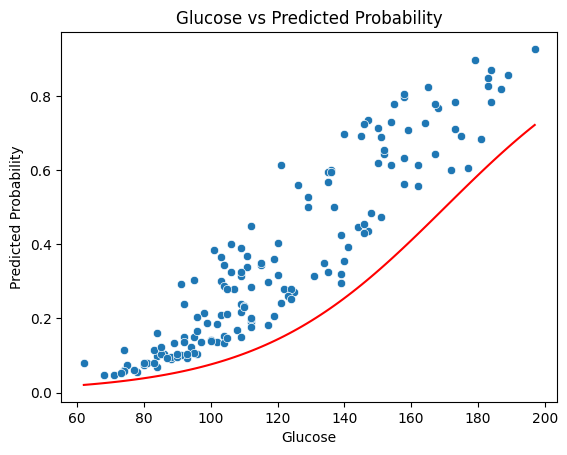

In [110]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import expit

y_prob = logreg.predict_proba(x_test)[:, 1]
sns.scatterplot(x=x_test['Glucose'], y=y_prob)

# Fit logistic curve manually
glucose_range = np.linspace(x_test['Glucose'].min(), x_test['Glucose'].max(), 100)
coef = logreg.coef_[0][x.columns.get_loc('Glucose')]
intercept = logreg.intercept_[0]
logistic_curve = expit(intercept + coef * glucose_range)

plt.plot(glucose_range, logistic_curve, color='red')
plt.xlabel("Glucose")
plt.ylabel("Predicted Probability")
plt.title("Glucose vs Predicted Probability")
plt.show()


In [111]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[85, 14],
       [22, 33]])

Text(0.5, 427.9555555555555, 'Predicted label')

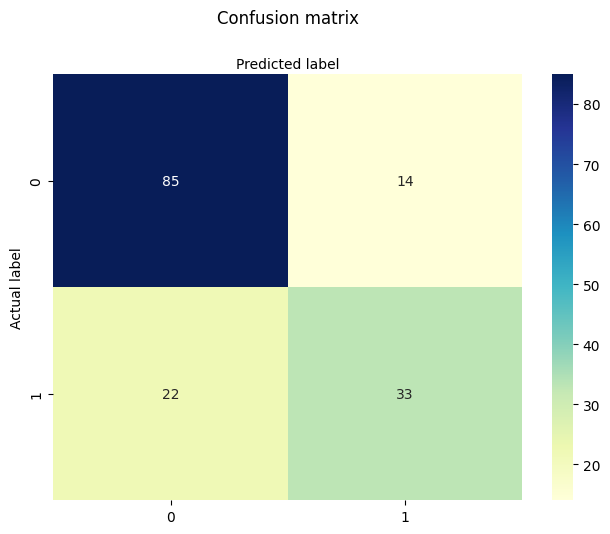

In [112]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [113]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.86      0.83        99
   with diabetes       0.70      0.60      0.65        55

        accuracy                           0.77       154
       macro avg       0.75      0.73      0.74       154
    weighted avg       0.76      0.77      0.76       154



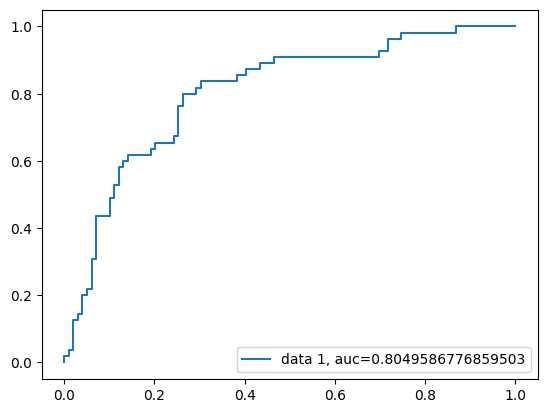

In [114]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, log_loss

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Log Loss:", log_loss(y_test, logreg.predict_proba(x_test)))

Accuracy: 0.7662337662337663
Log Loss: 0.5143910522733169


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
scores = cross_val_score(logreg, x_scaled, y, cv=5, scoring='accuracy')
print("Cross-validated scores:", scores)
print("Mean CV Accuracy:", np.mean(scores))


Cross-validated scores: [0.73376623 0.68831169 0.76623377 0.77124183 0.77124183]
Mean CV Accuracy: 0.7461590696884814


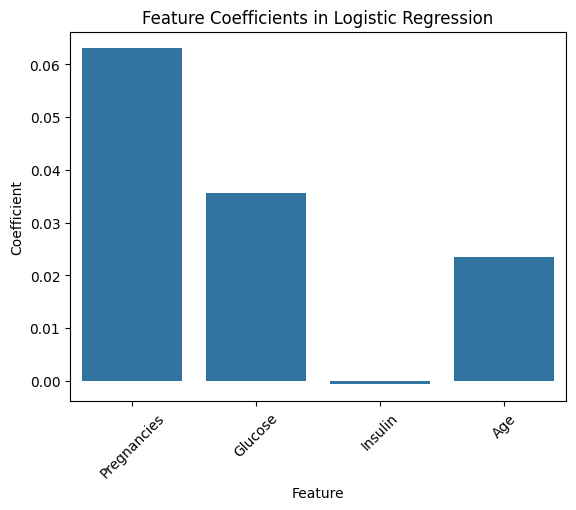

In [117]:
coefficients = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': logreg.coef_[0]
})
sns.barplot(x='Feature', y='Coefficient', data=coefficients)
plt.title("Feature Coefficients in Logistic Regression")
plt.xticks(rotation=45)
plt.show()


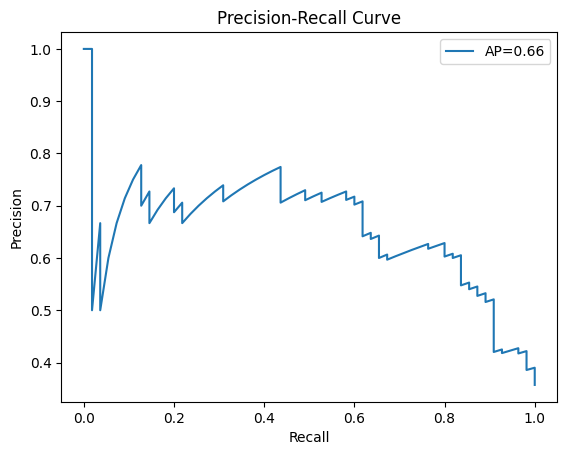

In [118]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

plt.plot(recall, precision, label=f'AP={avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
threshold = 0.3
y_pred_thresh = (y_pred_proba >= threshold).astype(int)

print("Classification report with threshold =", threshold)
print(classification_report(y_test, y_pred_thresh, target_nam1es=target_names))


Classification report with threshold = 0.3
                  precision    recall  f1-score   support

without diabetes       0.88      0.68      0.77        99
   with diabetes       0.59      0.84      0.69        55

        accuracy                           0.73       154
       macro avg       0.74      0.76      0.73       154
    weighted avg       0.78      0.73      0.74       154



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_full = data.drop(columns=['Outcome'])
x_full_scaled = scaler.fit_transform(x_full)

logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

print(classification_report(y_test, y_pred))
scaler = StandardScaler()

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        99
           1       0.70      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154

